# Grouping your data


In [ ]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
matplotlib.rcParams['axes.grid'] = True # show gridlines by default
%matplotlib inline

import pandas as pd

In [ ]:
if pd.__version__.startswith('0.23'):
    # this solves an incompatibility between pandas 0.23 and datareader 0.6
    # taken from https://stackoverflow.com/questions/50394873/
    core.common.is_list_like = api.types.is_list_like

from pandas_datareader.wb import download

In [ ]:
# ?download

In [ ]:
LOCATION='comtrade_milk_uk_monthly_14.csv'

In [ ]:
milk = pd.read_csv(LOCATION, dtype={'Commodity Code':str, 'Reporter Code':str})
milk.head(3)

In [ ]:
COLUMNS = ['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']
milk = milk[COLUMNS]

In [ ]:
milk_world = milk[milk['Partner'] == 'World']
milk_countries = milk[milk['Partner'] != 'World']

In [ ]:
milk_countries.to_csv('countrymilk.csv', index=False)

In [ ]:
load_test = pd.read_csv('countrymilk.csv', dtype={'Commodity Code':str, 'Reporter Code':str})
load_test.head(2)

In [ ]:
milk_imports = milk[milk['Trade Flow'] == 'Imports']
milk_countries_imports = milk_countries[milk_countries['Trade Flow'] == 'Imports']
milk_world_imports=milk_world[milk_world['Trade Flow'] == 'Imports']

In [ ]:
milkImportsInJanuary2014 = milk_countries_imports[milk_countries_imports['Period'] == 201401]
milkImportsInJanuary2014.sort_values('Trade Value (US$)',ascending=False).head(10)

In [ ]:
groups = milk_countries.groupby('Trade Flow')

In [ ]:
groups.get_group('Imports').head()

In [ ]:
GROUPING_COMMFLOW = ['Commodity Code','Trade Flow']

groups = milk_countries.groupby(GROUPING_COMMFLOW)
groups.groups.keys()

In [ ]:
GROUPING_PARTNERFLOW = ['Partner','Trade Flow']
groups = milk_countries.groupby(GROUPING_PARTNERFLOW)

GROUP_PARTNERFLOW= ('France','Imports')
groups.get_group( GROUP_PARTNERFLOW )

In [ ]:
groups = milk_countries.groupby(['Commodity Code'])
groups.get_group('0402').sort_values("Trade Value (US$)", ascending=False).head()

In [ ]:
data=[['A',10],['A',15],['A',5],['A',20],
['B',10],['B',10],['B',5],
['C',20],['C',30]]

df = pd.DataFrame(data=data, columns=["Commodity","Amount"])
df

In [ ]:
grouped = df.groupby('Commodity')

In [ ]:
grouped.groups.keys()

In [ ]:
grouped.get_group('B')

In [ ]:
grouped = df.groupby( ['Commodity','Year'])

In [ ]:
grouped.get_group( ('A',2014) )

#### Remember to run the cells above!

## Looking at apply and combine operations

Having split a dataset by grouping, an operation is ‘applied’ to each group.
The operation often takes one of two forms:
- a ‘summary’ operation, in which a summary statistic based on the rows contained
within each group is generated. A single value is returned for each group, for
example, the group median or mean, the number of rows in the group, or the
maximum or minimum value in the group. The final result will have M rows, one for
each of the M groups created by the split (that is, . groupby() ) operation.
- a ‘filtering’ or ‘filtration’ operation, in which groups of rows are retained or discarded
based on a particular property of the group as a whole. For example, only groups of
rows where the sum of all the values in the group is above some threshold are
retained. The effect is that each group keeps the same number of rows, but the resulting dataset (after combination, see below) may contain fewer groups than the
original.

The results of applying the summary or filtration operation are then combined to provide a
single output dataframe.
You will see how to apply a variety of summary operations, and in a
later step examples of filtration operations.

## Summary operations

Summary, or aggregation, operations are used to produce a single summary value or
statistic, such as the group average, for each separate group.
Find the ‘total’ amount within each group using a summary operation:

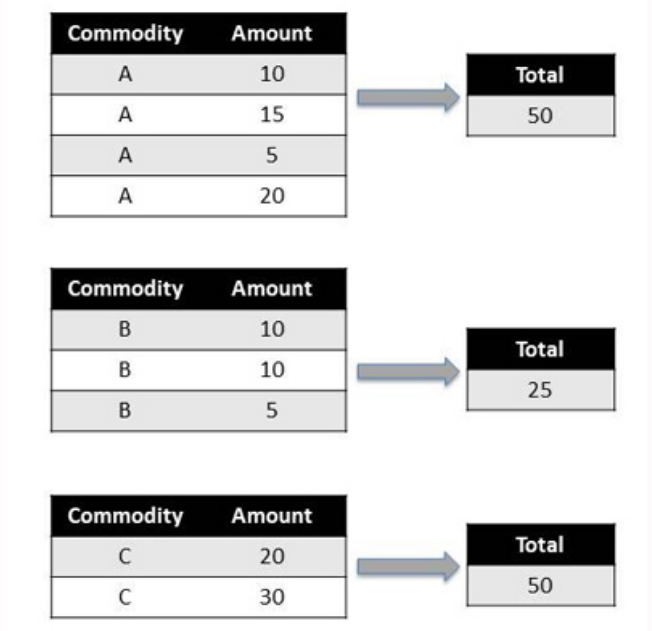

To apply a summary operator to each group, such as a function to find the mean value of
each group, and then automatically combine the results into a single output dataframe,
pass the name of the function in to the **aggregate()** method. Note that pandas will try to
use this operator to summarise each column in the grouped rows separately if there is
more than one column that can be summarised. So for example, if there was a ‘Volume’
column, it would also return total volumes.

Let’s use again the example dataframe defined earlier:

In [ ]:
df

Group the data by commodity type and then apply the sum operation and combine the
results in an output dataframe. The grouping elements are used to create index values in
the output dataframe.

In [ ]:
grouped=df.groupby('Commodity')
grouped.aggregate(sum)

In this case, the **aggregate()** method applies the sum summary operation to each
group and then automatically combines the results. For a summary operation such as
this, the resulting combined dataframe contains as many rows as there were groups
created by the splitting **.groupby()** operation.

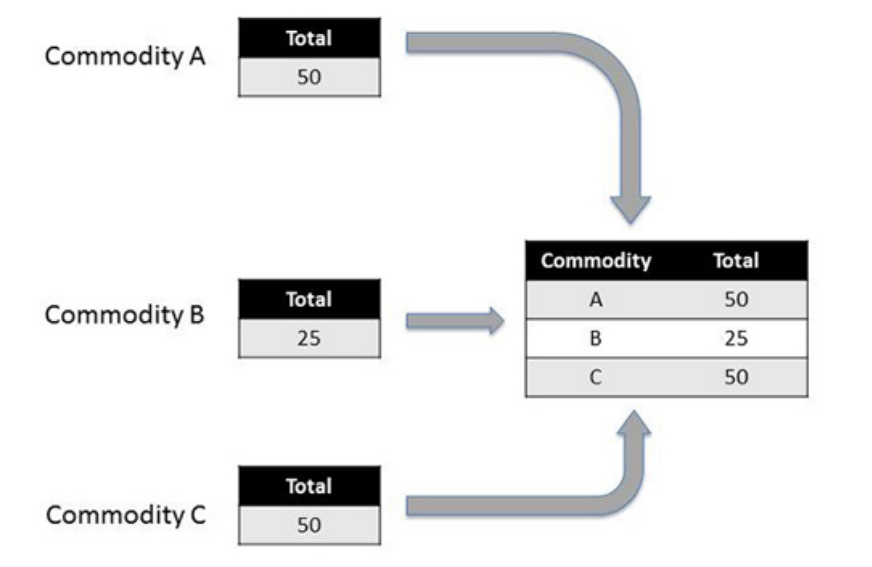

The slightly more general **apply()** method can also be substituted for the **aggregate()**
method and will similarly take the rows associated with each group, apply a function to
them, and return a combined result.
The **apply()** method can be really handy if you have defined a function of your own that
you want to apply to just the rows associated with each group. Simply pass the name of
the function to the **apply()** method and it will then call your function, once per group, on
the sets of rows associated with each group.
For example, find the top two items by ‘Amount’ in each group:

In [ ]:
def top2byAmount(g):
    return g.sort_values('Amount', ascending=False).head(2)
grouped.apply(top2byAmount)

The second index column containing the numbers 3, 1, 4 etc., contains the original index
value of each row.
In Week 3 the **apply()** method was called on a column, to apply the given function to
each cell. Here it was called on a grouped dataframe, to apply the given function to each
group.

### Aggregation operations – Generating *Summary* reports

Remember aggegration operations can be invoked using the `aggregate()` method.

To find the total value of imports traded for each commodity within the period, take the world dataframe, and sum the values over the trade value column within each grouping.

In [ ]:
milk_world_imports.groupby('Commodity Code')['Trade Value (US$)'].aggregate(sum)

So that's 222 million dollars or so on the 0401 commodity, and 341 million dollars or so on 0402.

If you total (sum) up all the individual country contributions, you should get similar amounts.

In [ ]:
milk_imports_grouped=milk_countries_imports.groupby('Commodity Code')
milk_imports_grouped['Trade Value (US$)'].aggregate(sum)

Not far off – there are perhaps a few rounding errors that would account for the odd couple of million that appear to be missing...

### Finding top ranked elements within a group

To find the leading import partners across all the milk products, group by partner, sum (total) the trade value within each group, and then sort the result in descending order before displaying the top few entries.

In [ ]:
milk_countries_imports_totals=milk_countries_imports.groupby('Partner')[['Trade Value (US$)']].aggregate(sum)
milk_countries_imports_totals.sort_values('Trade Value (US$)', ascending=False).head()

### Generating simple charts

One of the useful features of the `aggregate()` method is that it returns an object that can be plotted from directly, in this example a horizontal bar chart.

In [ ]:
milk_imports_grouped['Trade Value (US$)'].aggregate(sum).plot(kind='barh')

### Generating alternative groupings

Reports can also be generated to show the total imports per month for each commodity: group on commodity, trade flow and period, and then sum the trade values contained within each group.

In [ ]:
monthlies=milk_countries_imports.groupby(['Commodity','Trade Flow','Period'])['Trade Value (US$)'].aggregate(sum)
monthlies

The `groupby()` method *splits* the data into separate distinct groups of rows, and then the `aggregate()` method takes each group of rows from the results of the `groupby()` operation, *applies* the specified aggregation function, and then *combines* the results in the output. 

The aggregation function itself is applied to all columns of an appropriate type. In the example, the only numeric column that makes sense to aggregate over is the trade value column.

As well as built in summary operations, such as finding the total (`sum`), or maximum or minimum value in a group (`max`, `min`), aggregating functions imported from other Python packages can also be used. As shown in the next example, the `numpy` package has a function `mean` that will calculate the mean (simple average) value for a set of values.

### Generating several aggregation values at the same time
To generate several aggregate reports in a single line of code, provide a list of several aggregating operations to the `aggregate()` method:

In [ ]:
from numpy import mean

GROUPING_COMMFLOWPERIOD=['Commodity','Trade Flow','Period']
milk_countries.groupby(GROUPING_COMMFLOWPERIOD)['Trade Value (US$)'].aggregate([sum, min, max, mean])

By combining different grouping combinations and aggregate functions, you can quickly ask a range of questions over the data or generate a wide variety of charts from it.

Sometimes, however,  it can be quite hard to see any 'outstanding' values in a complex pivot table. In such cases, a chart may help you see which values are significantly larger or smaller than the other values.

For example, plot the maximum value by month across each code/period combination to see which month saw the maximum peak flow of imports from a single partner.

In [ ]:
milk_countries_imports.groupby(['Commodity Code','Period'])['Trade Value (US$)'].aggregate(max).plot(kind='barh')

For the 0401 commodity, the largest single monthly trade flow in 2014 appears to have taken place in September (201409). For the 0402 commodity, the weakest month was December, 2014.

To chart the mean trade flows by month, simply aggregate on the *mean* rather than the `max`.

In some cases, you might want to sort the order of the bars in a bar chart by value. By default, the `sort_values()` operator sorts a series or dataframe 'in place'. That is, it sorts the dataframe and doesn't return anything. Use the `inplace=False` parameter to return the sorted values so that the plot function can work on them.

The following chart displays the total imports for the combined commodities by partner (including the *World* partner) for the top five partners: the `sort_values()` element sorts the values in descending order, passes them to the `head()` element, which selects the top five and passes those onto the plotting function.

In [ ]:
milk_bypartner_total=milk[milk["Trade Flow"]=='Imports'].groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
milk_bypartner_total.head(5)

In this case, we don't need to specify the column name when sorting because the aggregation operator returns a *pandas* `Series` and we can sort the values directly:

In [ ]:
milk_bypartner_total.sort_values(ascending=False, inplace=False).head(5).plot(kind='barh')

**Exercise: Experimenting with split-apply-combine**
    
Work through task to practise the summary
operations.
As you complete the tasks, think about these questions:
- For your dataset, which months saw the highest and lowest levels of trade
activity? 

- Did there appear to be any seasonal behaviour?

- When graphically comparing total trade flows from the leading partner countries
to the World total, did it look as if any partners particularly dominated that area of
trade?

If you have time, find news reports discussing why this should be the case.

### Tasks

For the 0402 trade item, which months saw the greatest average (mean) activity? How does that compare with the maximum flows in each month? How does it compare with the total flow in each month?

Download your own choice of monthly dataset over one or two years containing both import and export data. (To start with, you may find it convenient to split the data into two dataframes, one for exports and one for imports.)

Using your own data:

- find out which months saw the largest total value of imports, or exports? 
- assess, by eye, if there appears to be any seasonal trend in the behaviour of imports or exports?
- plot a bar chart showing the top three importers or exporters of your selected trade item over the period you grabbed the data for, compared to the total world trade value.
